# **Preguntas de análisis**

1. ¿Cuál es la distribución temporal de los lanzamientos de misiones espaciales a lo largo de los años?

Esta pregunta te ayudará a comprender la evolución de las misiones espaciales con el tiempo y si ha habido algún patrón o tendencia en el número de lanzamientos.

2. ¿Cuál es la distribución de los lanzamientos por organización?

Esta pregunta te permitirá entender qué organizaciones han sido las más activas en lanzamientos de misiones espaciales y cómo se comparan entre sí.

3. ¿Cuál es la ubicación geográfica más común para los lanzamientos de misiones espaciales?

Investigar la distribución geográfica de los lanzamientos puede revelar patrones de preferencia por ciertos lugares para realizar misiones espaciales.

4. ¿Existe alguna correlación entre el estado del cohete y el éxito de la misión?

Analizar si existe una relación entre el estado del cohete en el momento del lanzamiento y el éxito o fracaso de la misión puede proporcionar información importante sobre la confiabilidad de los sistemas de lanzamiento.

5. ¿Cómo varía el precio de las misiones espaciales a lo largo del tiempo?

Este análisis puede arrojar luz sobre las tendencias de costos en el ámbito de las misiones espaciales y si ha habido cambios significativos en el precio de lanzamiento con el tiempo.

6. ¿Cuál es la proporción de misiones exitosas respecto al total de misiones lanzadas?

Este análisis te permitirá evaluar la tasa de éxito general de las misiones espaciales en tu dataset y si hay factores comunes asociados con el éxito o el fracaso.


In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df_mission_launches = pd.read_csv('mission_launches.csv')

In [158]:
df_mission_launches.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [159]:
df_mission_launches.shape

(4324, 9)

In [160]:
df_mission_launches.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [161]:
df_mission_launches.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [162]:
df_mission_launches[df_mission_launches['Price'].isnull()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [163]:
df_mission_launches['Price'].value_counts().sum()

964

In [164]:
df_mission_launches['Price'].unique()

array(['50.0', '29.75', nan, '65.0', '145.0', '64.68', '48.5', '90.0',
       '46.0', '28.3', '29.15', '7.5', '30.8', '5.3', '12.0', '112.5',
       '120.0', '153.0', '200.0', '85.0', '115.0', '41.8', '21.0', '31.0',
       '40.0', '164.0', '62.0', '37.0', '350.0', '39.0', '47.0', '35.0',
       '69.7', '109.0', '45.0', '123.0', '130.0', '25.0', '56.5', '15.0',
       '29.0', '80.0', '140.0', '55.0', '59.5', '450.0', '7.0', '20.14',
       '133.0', '190.0', '135.0', '20.0', '136.6', '5,000.0', '1,160.0',
       '59.0', '63.23'], dtype=object)

In [165]:
df_mission_launches['Price'] = df_mission_launches['Price'].astype(str)

# Luego, reemplaza las comas en los valores que no sean nulos y conviértelos a float
df_mission_launches['Price'] = df_mission_launches['Price'].apply(lambda x: float(x.replace(',', '')) if x != 'nan' else np.nan)

In [166]:
df_mission_launches['Price'].unique()

array([  50.  ,   29.75,     nan,   65.  ,  145.  ,   64.68,   48.5 ,
         90.  ,   46.  ,   28.3 ,   29.15,    7.5 ,   30.8 ,    5.3 ,
         12.  ,  112.5 ,  120.  ,  153.  ,  200.  ,   85.  ,  115.  ,
         41.8 ,   21.  ,   31.  ,   40.  ,  164.  ,   62.  ,   37.  ,
        350.  ,   39.  ,   47.  ,   35.  ,   69.7 ,  109.  ,   45.  ,
        123.  ,  130.  ,   25.  ,   56.5 ,   15.  ,   29.  ,   80.  ,
        140.  ,   55.  ,   59.5 ,  450.  ,    7.  ,   20.14,  133.  ,
        190.  ,  135.  ,   20.  ,  136.6 , 5000.  , 1160.  ,   59.  ,
         63.23])

In [167]:
df_mission_launches['Price'].describe()

count     964.000000
mean      153.792199
std       288.450732
min         5.300000
25%        40.000000
50%        62.000000
75%       164.000000
max      5000.000000
Name: Price, dtype: float64

<Axes: ylabel='Price'>

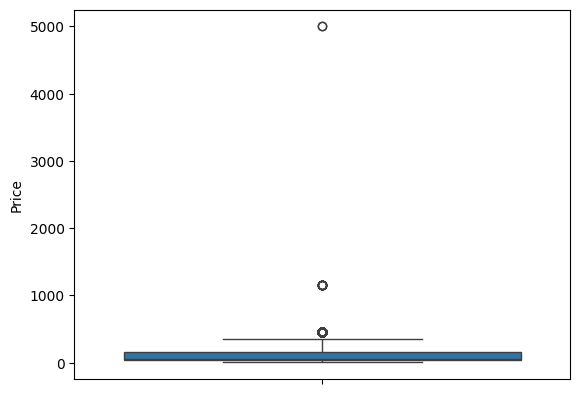

In [168]:
sns.boxplot(df_mission_launches['Price'])

<Axes: xlabel='Price', ylabel='Count'>

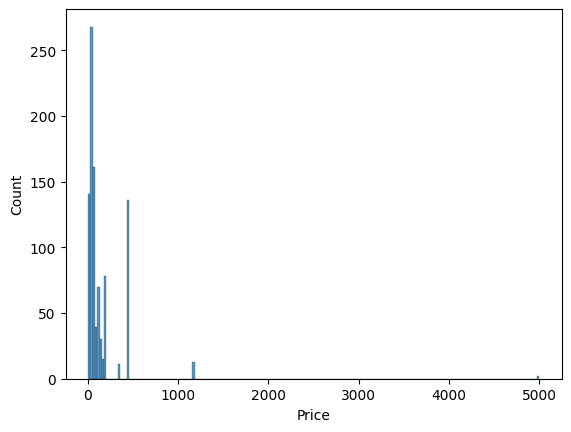

In [169]:
sns.histplot(df_mission_launches['Price'])

In [170]:
df_mission_launches.dropna(subset=['Price'], inplace=True)

In [171]:
df_mission_launches['Date']

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
5       Sat Jul 25, 2020 03:13 UTC
                   ...            
3855    Fri Jul 29, 1966 18:43 UTC
3971    Thu May 06, 1965 15:00 UTC
3993    Thu Feb 11, 1965 15:19 UTC
4000    Thu Dec 10, 1964 16:52 UTC
4020    Tue Sep 01, 1964 15:00 UTC
Name: Date, Length: 964, dtype: object

In [172]:
from datetime import datetime

fechas_convertidas = [
    datetime.strptime(fecha, '%a %b %d, %Y %H:%M UTC').strftime('%d %b %Y') if 'UTC' in fecha else datetime.strptime(fecha, '%a %b %d, %Y').strftime('%d %b %Y') 
    for fecha in df_mission_launches['Date']
]

# Asignar fechas convertidas de vuelta al DataFrame
df_mission_launches['Date'] = fechas_convertidas

In [173]:
df_mission_launches['Date']

0       07 Aug 2020
1       06 Aug 2020
3       30 Jul 2020
4       30 Jul 2020
5       25 Jul 2020
           ...     
3855    29 Jul 1966
3971    06 May 1965
3993    11 Feb 1965
4000    10 Dec 1964
4020    01 Sep 1964
Name: Date, Length: 964, dtype: object

In [174]:
df_mission_launches['Date'].duplicated().value_counts()

Date
False    922
True      42
Name: count, dtype: int64

In [175]:
df_mission_launches.drop_duplicates(subset=['Date'], inplace=True)

In [176]:
df_mission_launches['Date'] = pd.to_datetime(df_mission_launches['Date'])

In [180]:
df_mission_launches.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
dtype: object

In [177]:
df_mission_launches.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [178]:
df_mission_launches

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success


# 1. ¿Cuál es la distribución temporal de los lanzamientos de misiones espaciales a lo largo de los años?

In [181]:
df_launches_by_year = df_mission_launches.copy()

In [182]:
df_launches_by_year['Date'] = df_launches_by_year['Date'].dt.year

In [183]:
launches_by_year = df_launches_by_year['Date'].value_counts(ascending= False).sort_index()

In [184]:
launches_df = pd.DataFrame(launches_by_year.sort_values(ascending=False))
launches_df.reset_index(inplace=True)
launches_df.columns = ['Año', 'Número de lanzamientos']

# Mostrar la tabla
print(launches_df)

     Año  Número de lanzamientos
0   2018                      81
1   2019                      65
2   2016                      61
3   2017                      59
4   2020                      47
5   2014                      40
6   2015                      36
7   2013                      33
8   2009                      31
9   2011                      29
10  2010                      29
11  2008                      27
12  2007                      27
13  2006                      25
14  2012                      24
15  2003                      20
16  1998                      18
17  1997                      17
18  2004                      17
19  2002                      17
20  2000                      16
21  1994                      16
22  2005                      15
23  1999                      14
24  1996                      14
25  1993                      12
26  1992                      12
27  1990                      11
28  1985                      10
29  2001  

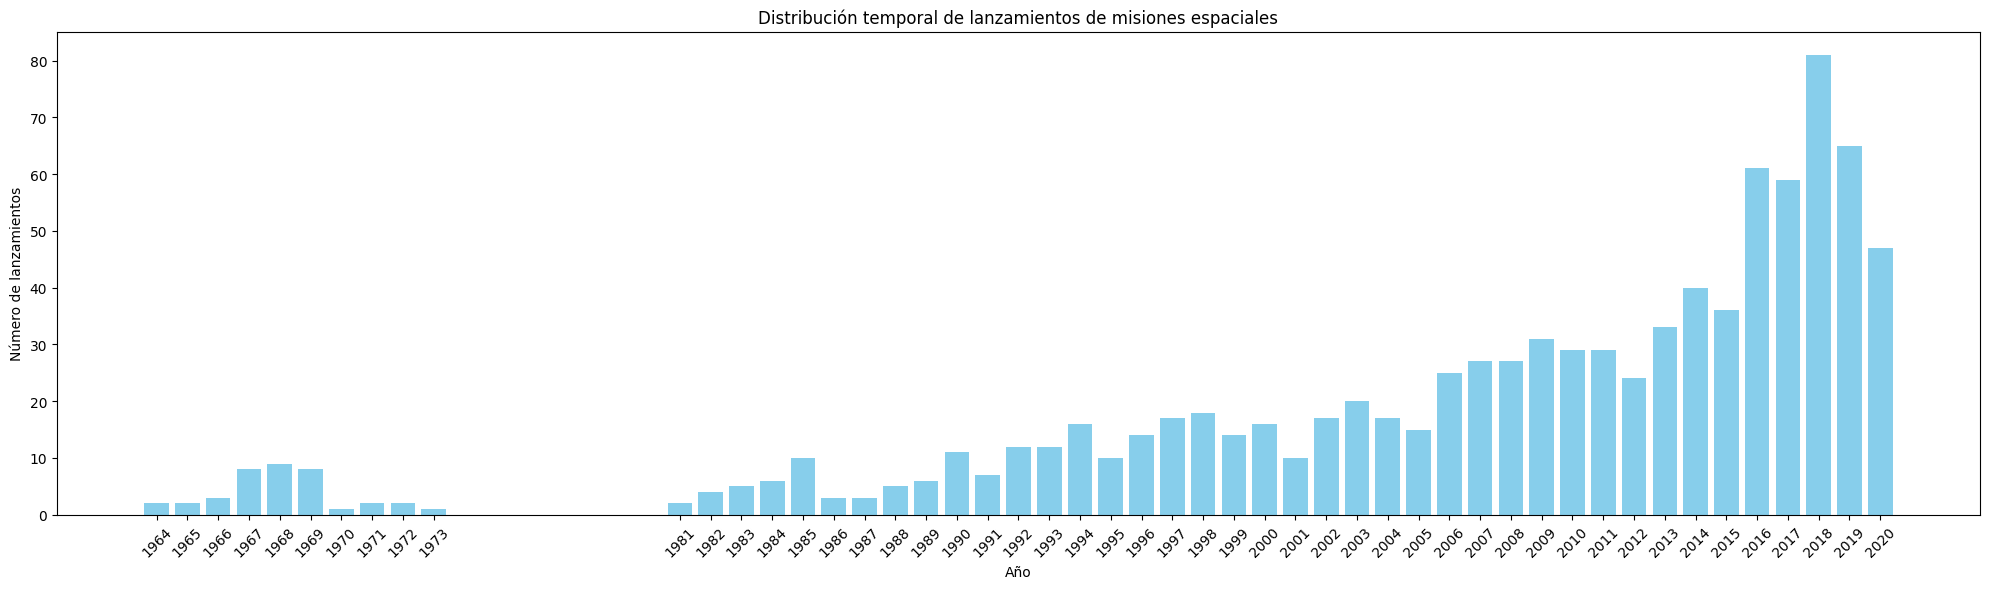

In [185]:
plt.figure(figsize=(20, 6))
plt.bar(launches_by_year.index, launches_by_year.values, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de lanzamientos')
plt.title('Distribución temporal de lanzamientos de misiones espaciales')

# Mostrar la gráfica
plt.xticks(launches_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

In [186]:
launches_by_year.describe()

count    50.000000
mean     18.440000
std      18.270261
min       1.000000
25%       5.250000
50%      13.000000
75%      26.500000
max      81.000000
Name: count, dtype: float64

# 2. ¿Cuál es la distribución de los lanzamientos por organización?



In [187]:
df_launches_by_Organisation = df_mission_launches['Organisation'].copy()

In [188]:
launches_by_Organisation = df_launches_by_Organisation.value_counts()

In [189]:
df_launches = pd.DataFrame(launches_by_Organisation.sort_values(ascending=False))
df_launches.reset_index(inplace=True)
df_launches.columns = ['Organización', 'Número de lanzamientos']

# Mostrar la tabla
print(df_launches)

       Organización  Número de lanzamientos
0              NASA                     149
1              CASC                     146
2            SpaceX                      96
3       Arianespace                      94
4               ULA                      93
5          Northrop                      83
6              ISRO                      61
7               MHI                      35
8            VKS RF                      30
9      US Air Force                      25
10        Roscosmos                      21
11        Kosmotras                      21
12         Eurockot                      13
13              ILS                      13
14       Rocket Lab                       9
15  Martin Marietta                       9
16           Boeing                       7
17         Lockheed                       7
18             JAXA                       3
19        RVSN USSR                       2
20           ExPace                       1
21           Sandia             

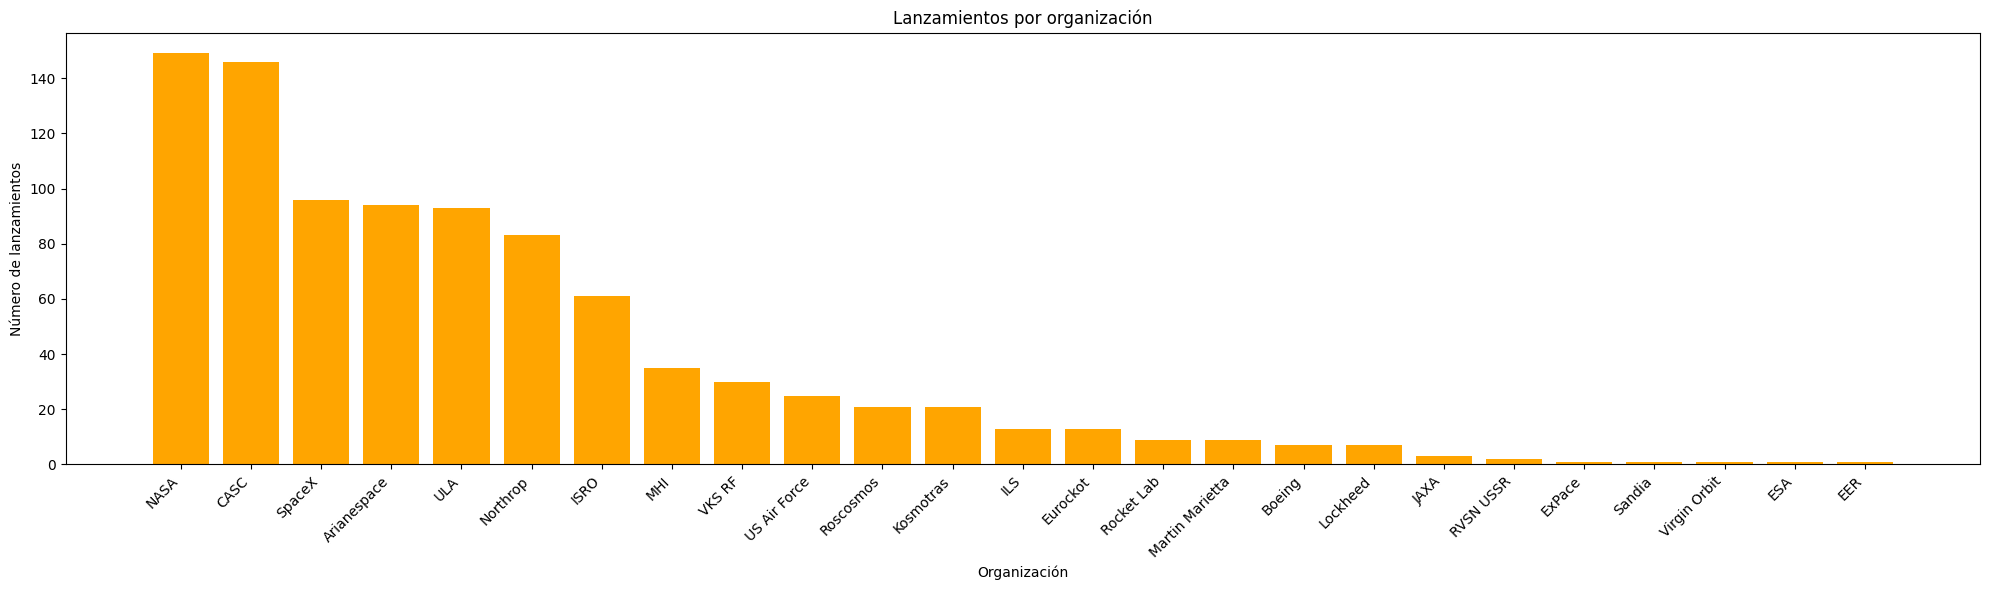

In [190]:
plt.figure(figsize=(20, 6))
plt.bar(launches_by_Organisation.index, launches_by_Organisation.values, color='orange')

# Agregar etiquetas y título
plt.xlabel('Organización')
plt.ylabel('Número de lanzamientos')
plt.title('Lanzamientos por organización')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [191]:
launches_by_Organisation.describe()

count     25.000000
mean      36.880000
std       46.130539
min        1.000000
25%        3.000000
50%       13.000000
75%       61.000000
max      149.000000
Name: count, dtype: float64

# 3. ¿Cuál es la ubicación geográfica más común para los lanzamientos de misiones espaciales?

In [192]:
df_mission_launches['Location'].mode()

0    LC-39A, Kennedy Space Center, Florida, USA
Name: Location, dtype: object

In [193]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

#Check sample location
location = geolocator.geocode("Kennedy Space Center, Florida, USA")
location

Location(John F. Kennedy Space Center, Brevard County, Florida, United States, (28.519230999999998, -80.64317239050752, 0.0))

In [194]:
from IPython.display import display
import folium

# Coordenadas de Baikonur Cosmodrome, Kazakhstan
latitude = 28.519230999999998
longitude = -80.64317239050752

# Crear el mapa centrado en Baikonur Cosmodrome
m = folium.Map(location=[latitude, longitude], zoom_start=15)

# Añadir un marcador en Baikonur Cosmodrome
folium.Marker(
    location=[latitude, longitude],
    popup="Baikonur Cosmodrome",
    icon=folium.Icon(color="oranage", icon="rocket"),
).add_to(m)

# Mostrar el mapa en el notebook
display(m)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11328\2089509953.py:15: UserWarning: color argument of Icon should be one of: {'black', 'blue', 'darkgreen', 'red', 'darkred', 'darkblue', 'gray', 'lightred', 'darkpurple', 'pink', 'green', 'orange', 'purple', 'cadetblue', 'lightgreen', 'beige', 'white', 'lightgray', 'lightblue'}.
  icon=folium.Icon(color="oranage", icon="rocket"),


# 1. ¿Existe alguna correlación entre el estado del cohete y el éxito de la misión?

In [195]:
df_Rocket_Mission_Status = df_mission_launches[['Rocket_Status', 'Mission_Status']].copy()

In [196]:
df_Rocket_Mission_Status.Mission_Status.unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [197]:
mapping = {
    'Success': 3,
    'Failure': 0,
    'Prelaunch Failure': 1,
    'Partial Failure': 2
}

# Aplicar el mapeo a la columna 'Mission_Status'
df_Rocket_Mission_Status['Mission_Status'] = df_Rocket_Mission_Status['Mission_Status'].replace(mapping)

In [198]:
df_Rocket_Mission_Status.Rocket_Status.unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [199]:
mapping = {'StatusActive': 1,
           'StatusRetired': 0}

df_Rocket_Mission_Status['Rocket_Status'] = df_Rocket_Mission_Status['Rocket_Status'].replace(mapping)

In [200]:
df_Rocket_Mission_Status.corr()

,Rocket_Status,Mission_Status
Rocket_Status,1.000000,0.048722
Mission_Status,0.048722,1.000000


In [201]:
df_Rocket_Mission_Status.describe()

,Rocket_Status,Mission_Status
count,922.000000,922.000000
mean,0.596529,2.865510
std,0.490860,0.588824
min,0.000000,0.000000
25%,0.000000,3.000000
50%,1.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


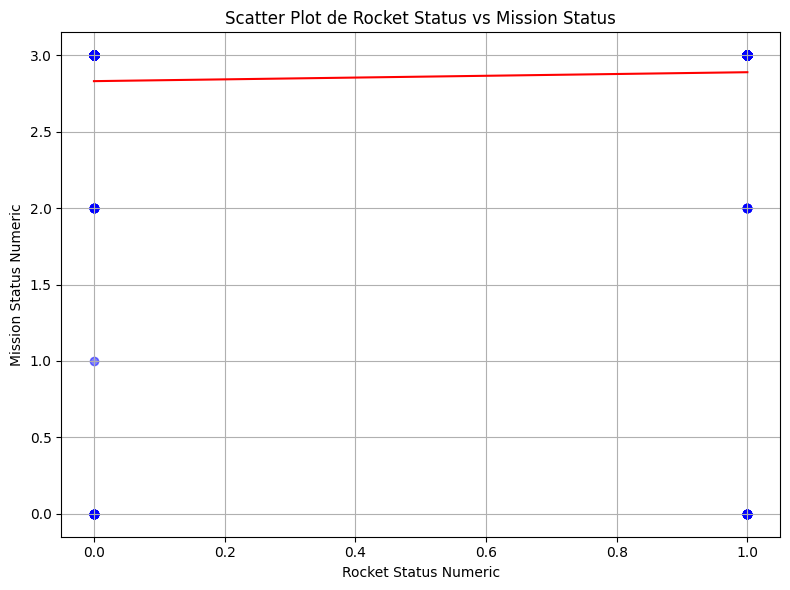

In [213]:
from scipy.stats import linregress

# Calcular la línea de regresión
slope, intercept, r_value, p_value, std_err = linregress(df_Rocket_Mission_Status['Rocket_Status'], df_Rocket_Mission_Status['Mission_Status'])

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_Rocket_Mission_Status['Rocket_Status'],
            df_Rocket_Mission_Status['Mission_Status'],
            alpha=0.5,
            color='blue')

# Agregar la línea de regresión
plt.plot(df_Rocket_Mission_Status['Rocket_Status'], 
         intercept + slope * df_Rocket_Mission_Status['Rocket_Status'], 
         color='red', label=f'Regresión Lineal (y={slope:.2f}x + {intercept:.2f})')


# Agregar etiquetas y título
plt.xlabel('Rocket Status Numeric')
plt.ylabel('Mission Status Numeric')
plt.title('Scatter Plot de Rocket Status vs Mission Status')

# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.tight_layout()
plt.show()

se puede ver que hay una correlaccion muy baja entre 'Rocket_Status' y 'Mission_Status'.
Sin embargo se puede realizar un analisis del estado de cohete con más exito de misiones

In [231]:
df_Rocket_Mission_Status2 = df_mission_launches[['Rocket_Status', 'Mission_Status']].copy()

In [236]:
Status_Retired = df_Rocket_Mission_Status2.loc[df_Rocket_Mission_Status2['Rocket_Status'] == 'StatusRetired'].value_counts()
print(Status_Retired)

Rocket_Status  Mission_Status   
StatusRetired  Success              344
               Failure               17
               Partial Failure       10
               Prelaunch Failure      1
Name: count, dtype: int64


In [237]:
Status_Active = df_Rocket_Mission_Status2.loc[df_Rocket_Mission_Status2['Rocket_Status'] == 'StatusActive'].value_counts()
print(Status_Active)

Rocket_Status  Mission_Status 
StatusActive   Success            525
               Failure             18
               Partial Failure      7
Name: count, dtype: int64


In [238]:
#este paso es importante para graficar

Status_Retired = Status_Retired.reset_index()
Status_Active = Status_Active.reset_index()

In [239]:
Status_Active

,Rocket_Status,Mission_Status,count
0,StatusActive,Success,525
1,StatusActive,Failure,18
2,StatusActive,Partial Failure,7


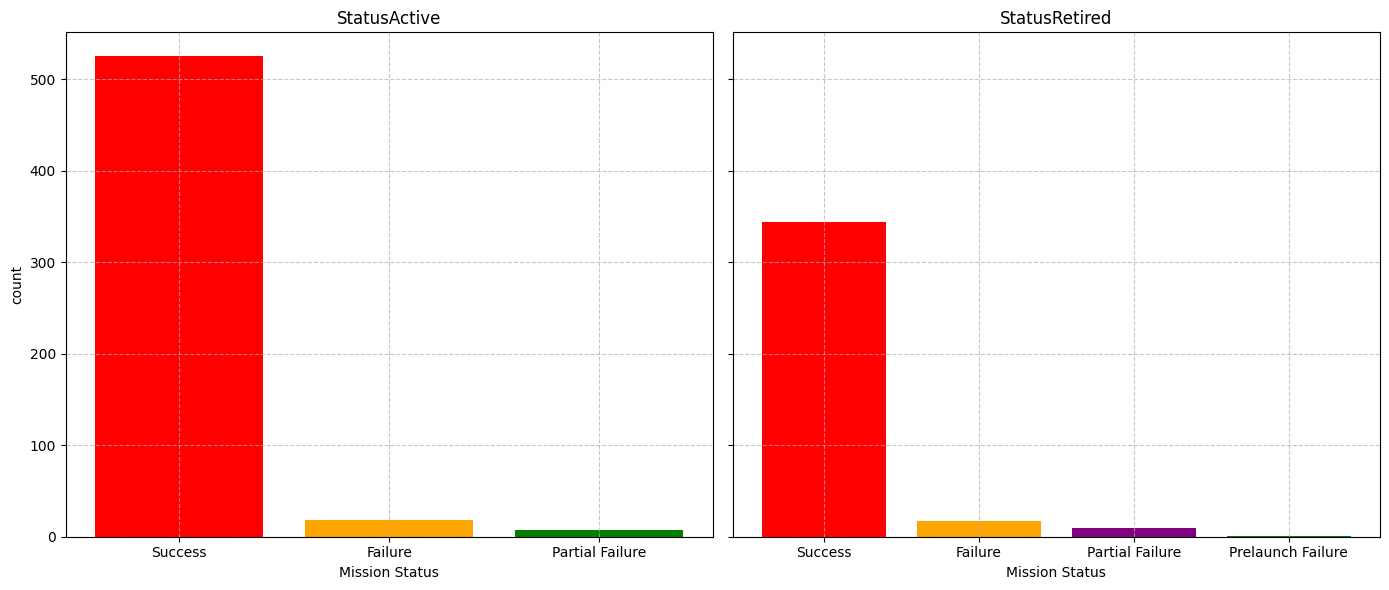

In [240]:

# Crear el gráfico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Gráfico para StatusActive
axes[0].bar(Status_Active['Mission_Status'], Status_Active['count'], color=['red', 'orange', 'green'])
axes[0].set_title('StatusActive')
axes[0].set_ylabel('count')

# Gráfico para StatusRetired
axes[1].bar(Status_Retired['Mission_Status'], Status_Retired['count'], color=['red', 'orange', 'purple', 'green'])
axes[1].set_title('StatusRetired')

# Configuración general
for ax in axes:
    ax.set_xlabel('Mission Status')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 5. ¿Cómo varía el precio de las misiones espaciales a lo largo del tiempo?

In [ ]:
df_date_price = df_mission_launches[['Date','Price']].copy()

In [ ]:
# Extraer el año de la columna 'Date'
df_date_price['Year'] = df_date_price['Date'].dt.year

# Agrupar los precios por año y calcular el promedio
precios_por_anio = df_date_price.groupby('Year')['Price'].mean()

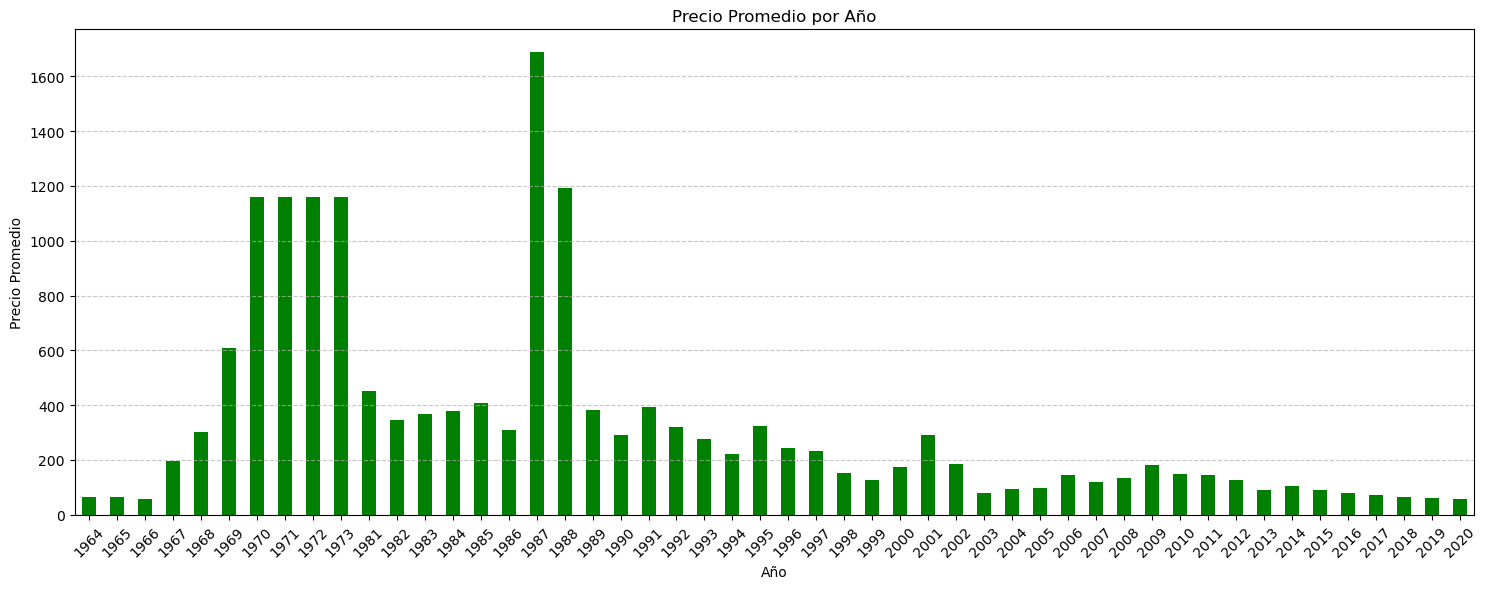

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
precios_por_anio.plot(kind='bar', color='green')
plt.title('Precio Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. ¿Cuál es la proporción de misiones exitosas respecto al total de misiones lanzadas?

In [ ]:
df_Mission_Status = df_mission_launches['Mission_Status'].copy()

In [ ]:
df_Mission_Status = df_Mission_Status.value_counts()

In [ ]:
df_Mission_Status

Success              869
Failure               35
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

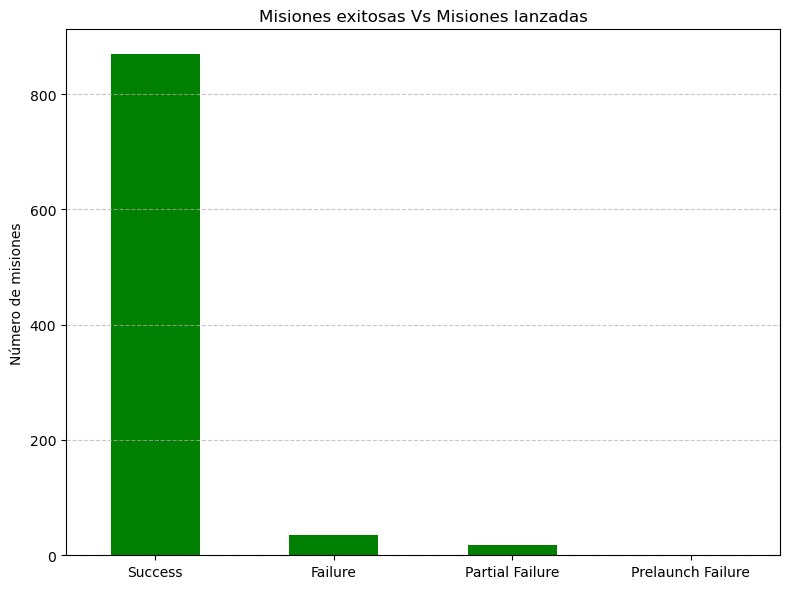

In [ ]:
plt.figure(figsize=(8, 6))
df_Mission_Status.plot(kind='bar', color='green')
plt.title('Misiones exitosas Vs Misiones lanzadas')
plt.ylabel('Número de misiones')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Preguntas de probabilidad para analizar el dataset:**

1. ¿Cuál es la probabilidad de que una misión espacial sea exitosa dado el estado del cohete?

Puedes calcular la proporción de misiones exitosas para cada estado del cohete (por ejemplo, en buen estado, dañado, etc.).

2. ¿Cuál es la probabilidad de que una misión espacial sea exitosa para cada organización?

Calcula la probabilidad de éxito de las misiones para cada organización que haya lanzado cohetes.

3. ¿Cuál es la probabilidad de que una misión espacial tenga un precio superior a cierto umbral dado el estado del cohete?

Puedes calcular la probabilidad de que el precio de una misión supere cierto límite condicionado al estado del cohete.

4. ¿Cuál es la probabilidad de que una misión espacial sea lanzada desde una ubicación específica dado el éxito de la misión?

Analiza la probabilidad de que una misión sea lanzada desde una ubicación determinada, dada su exitosidad.

5. ¿Cuál es la probabilidad de que una misión espacial sea exitosa en un año determinado?

Calcula la probabilidad de éxito de las misiones en un año específico en comparación con otros años.

6. ¿Cuál es la probabilidad de que una misión espacial tenga un precio dentro de cierto rango dado el éxito de la misión?

Analiza la probabilidad de que el precio de una misión esté dentro de cierto rango, condicionado a si la misión fue exitosa o no.

#1. ¿Cuál es la probabilidad de que una misión espacial sea exitosa dado el estado del cohete?

In [ ]:
# Calcular las frecuencias conjuntas de Rocket_Status y Mission_Status
frecuencias_conjuntas = pd.crosstab(df_mission_launches['Rocket_Status'], df_mission_launches['Mission_Status'])

# Calcular la probabilidad condicional de Mission_Status dado Rocket_Status
probabilidad_exitosa_dado_estado_cohete = frecuencias_conjuntas['Success'] / frecuencias_conjuntas.sum(axis=1)

# Mostrar las probabilidades condicionales
print(probabilidad_exitosa_dado_estado_cohete)

Rocket_Status
StatusActive     0.954545
StatusRetired    0.924731
dtype: float64


¿Cuál es la probabilidad de que una misión espacial sea exitosa para cada organización?

In [ ]:
# Agrupa los datos por organización y cuenta el número de misiones y el número de misiones exitosas
grouped_data = df_mission_launches.groupby('Organisation')['Mission_Status'].value_counts().unstack().fillna(0)

# Calcula la probabilidad de éxito para cada organización
grouped_data['Probabilidad_Exito'] = grouped_data['Success'] / grouped_data.sum(axis=1)

# Muestra la probabilidad de éxito para cada organización
print(grouped_data['Probabilidad_Exito'])

Organisation
Arianespace        0.968085
Boeing             0.857143
CASC               0.958904
EER                0.000000
ESA                1.000000
Eurockot           0.923077
ExPace             0.000000
ILS                1.000000
ISRO               0.868852
JAXA               1.000000
Kosmotras          0.952381
Lockheed           1.000000
MHI                1.000000
Martin Marietta    0.777778
NASA               0.979866
Northrop           0.891566
RVSN USSR          1.000000
Rocket Lab         0.888889
Roscosmos          0.952381
Sandia             0.000000
SpaceX             0.937500
ULA                0.989247
US Air Force       0.880000
VKS RF             0.900000
Virgin Orbit       0.000000
Name: Probabilidad_Exito, dtype: float64


In [ ]:
# Definir el umbral de precio deseado
umbral = 100  # Por ejemplo, $1,000,000

# Agrupar los datos por estado del cohete y contar el número total de misiones y el número de misiones con precio superior al umbral
grouped_data = df_mission_launches.groupby('Rocket_Status')['Price'].agg(['count', lambda x: (x > umbral).sum()])

# Renombrar las columnas para mayor claridad
grouped_data.columns = ['Total_Misiones', 'Misiones_Precio_Superior']

# Calcular la probabilidad de que una misión tenga un precio superior al umbral dado el estado del cohete
grouped_data['Probabilidad_Precio_Superior'] = grouped_data['Misiones_Precio_Superior'] / grouped_data['Total_Misiones']

# Mostrar la probabilidad de precio superior para cada estado del cohete
print(grouped_data['Probabilidad_Precio_Superior'])

Rocket_Status
StatusActive     0.300000
StatusRetired    0.494624
Name: Probabilidad_Precio_Superior, dtype: float64


In [ ]:
# Agrupar los datos por ubicación de lanzamiento y contar el número total de misiones y el número de misiones exitosas
grouped_data = df_mission_launches.groupby('Location')['Mission_Status'].value_counts().unstack().fillna(0)

# Calcular la probabilidad de que una misión sea exitosa dado que fue lanzada desde una ubicación específica
grouped_data['Probabilidad_Exito'] = grouped_data['Success'] / grouped_data.sum(axis=1)

# Mostrar la probabilidad de éxito para cada ubicación de lanzamiento
print(grouped_data['Probabilidad_Exito'])

Location
Cosmic Girl, Mojave Air and Space Port, California, USA                                    0.000000
ELA-3, Guiana Space Centre, French Guiana, France                                          0.974026
ELS, Guiana Space Centre, French Guiana, France                                            1.000000
ELV-1 (SLV), Guiana Space Centre, French Guiana, France                                    0.928571
First Launch Pad, Satish Dhawan Space Centre, India                                        0.891892
LA-Y1, Tanegashima Space Center, Japan                                                     1.000000
LA-Y2, Tanegashima Space Center, Japan                                                     1.000000
LC-2, Xichang Satellite Launch Center, China                                               0.906250
LC-3, Xichang Satellite Launch Center, China                                               1.000000
LC-39A, Kennedy Space Center, Florida, USA                                                 

In [ ]:
# Extraer el año de la columna de fechas 'Date'
df_mission_launches['Year'] = df_mission_launches['Date'].dt.year

# Contar el número total de misiones y el número de misiones exitosas para cada año
missions_by_year = df_mission_launches.groupby('Year')['Mission_Status'].value_counts().unstack().fillna(0)

# Calcular la probabilidad de éxito para cada año
missions_by_year['Success Probability'] = missions_by_year['Success'] / (missions_by_year['Success'] + missions_by_year['Failure'])

# Mostrar la probabilidad de éxito para cada año
print(missions_by_year['Success Probability'])

Year
1964    0.500000
1965    1.000000
1966    1.000000
1967    0.857143
1968    1.000000
1969    1.000000
1970    1.000000
1971    1.000000
1972    1.000000
1973    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    1.000000
1986    0.666667
1987    1.000000
1988    1.000000
1989    1.000000
1990    0.909091
1991    1.000000
1992    1.000000
1993    0.833333
1994    0.928571
1995    0.800000
1996    0.928571
1997    1.000000
1998    1.000000
1999    1.000000
2000    1.000000
2001    0.888889
2002    0.941176
2003    0.950000
2004    1.000000
2005    0.933333
2006    0.880000
2007    0.960000
2008    0.962963
2009    0.967742
2010    0.931034
2011    0.964286
2012    1.000000
2013    0.968750
2014    0.975000
2015    0.944444
2016    0.983051
2017    0.964912
2018    1.000000
2019    0.969231
2020    0.936170
Name: Success Probability, dtype: float64


In [ ]:
# Define el rango de precios
rango = (100, 2000)  # Por ejemplo, entre $1,000,000 y $2,000,000

# Agrupa los datos por estado de la misión (éxito o fracaso) y cuenta el número total de misiones y el número de misiones dentro del rango de precios
grouped_data = df_mission_launches.groupby('Mission_Status')['Price'].agg(['count', lambda x: ((x >= rango[0]) & (x <= rango[1])).sum()])

# Renombra las columnas para mayor claridad
grouped_data.columns = ['Total_Misiones', 'Misiones_Precio_En_Rango']

# Calcula la probabilidad de que una misión tenga un precio dentro del rango dado el estado de la misión
grouped_data['Probabilidad_Precio_En_Rango'] = grouped_data['Misiones_Precio_En_Rango'] / grouped_data['Total_Misiones']

# Muestra la probabilidad de precio en rango para cada estado de la misión
print(grouped_data['Probabilidad_Precio_En_Rango'])

Mission_Status
Failure              0.114286
Partial Failure      0.235294
Prelaunch Failure    0.000000
Success              0.390104
Name: Probabilidad_Precio_En_Rango, dtype: float64
